In [25]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import random
import pickle

In [26]:
categories = ['cats', 'dogs']

In [27]:
img_size = 100
path = os.path.join(os.getcwd(),'train')
data = []

for category in categories:
    folder = os.path.join(path, category)
    label = categories.index(category)
    for img in os.listdir (folder):
        img_path = os.path.join(folder, img)
        img_array = cv2.imread(img_path)
        img_array = cv2.resize(img_array, (img_size, img_size))
        data.append([img_array, label])

In [28]:
random.shuffle(data)

In [29]:
Xtrain = []
Ytrain = []

for features,labels in data:
    Xtrain.append(features)
    Ytrain.append(labels)

In [30]:
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [31]:
pickle.dump(Xtrain, open('X.pkl', 'wb'))
pickle.dump(Ytrain, open('Y.pkl', 'wb'))

In [33]:
Xtrain = pickle.load(open('X.pkl', 'rb'))
Ytrain = pickle.load(open('Y.pkl', 'rb'))

In [35]:
Xtrain = Xtrain / 255.0

In [39]:
model = Sequential([
    Conv2D (64, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D (64, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    
    Flatten (),
    Dense (128, input_shape = Xtrain[1:], activation = 'relu',),
    Dense (2, activation = 'softmax')
    
])

In [40]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [41]:
model.fit(Xtrain, Ytrain, epochs = 5)

Epoch 1/5
719/719 [==============================] - 633s 878ms/step - loss: 0.6321 - accuracy: 0.6506
Epoch 2/5
719/719 [==============================] - 644s 896ms/step - loss: 0.5245 - accuracy: 0.7423
Epoch 3/5
719/719 [==============================] - 645s 898ms/step - loss: 0.4311 - accuracy: 0.8002
Epoch 4/5
719/719 [==============================] - 636s 885ms/step - loss: 0.3093 - accuracy: 0.8668
Epoch 5/5
719/719 [==============================] - 643s 894ms/step - loss: 0.1633 - accuracy: 0.9367


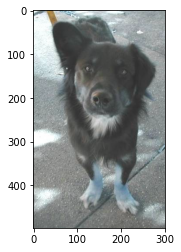

In [50]:
img_size = 100
path = os.path.join(os.getcwd(),'valid')
validationData = []

for category in categories:
    folder = os.path.join(path, category)
    label = categories.index(category)
    for img in os.listdir (folder):
        img_path = os.path.join(folder, img)
        img_array = cv2.imread(img_path)
        img_array = cv2.resize(img_array, (img_size, img_size))
        validationData.append([img_array, label])

In [53]:
random.shuffle(validationData)

In [54]:
Xvalid = []
Yvalid = []

for features,labels in data:
    Xvalid.append(features)
    Yvalid.append(labels)

In [56]:
Xvalid = np.array(Xvalid)
Yvalid = np.array(Yvalid)

In [58]:
Xvalid = Xvalid / 255.0

In [61]:
model.evaluate(Xvalid, Yvalid)

719/719 [==============================] - 179s 248ms/step - loss: 0.0913 - accuracy: 0.9763


[0.09130273759365082, 0.9763043522834778]

In [83]:
img_size = 100
path = os.path.join(os.getcwd(),'test1')
testData = []

for img in os.listdir (path):
    img_path = os.path.join(path, img)
    img_array = cv2.imread(img_path)
    img_array = cv2.resize(img_array, (img_size, img_size))
    testData.append(img_array)

In [84]:
random.shuffle(testData)

In [85]:
testData = np.array(testData)

In [86]:
testData = testData / 255.0

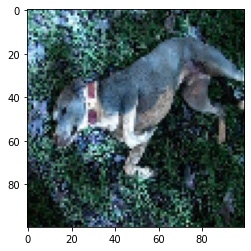

1/1 [==============================] - 0s 49ms/step
The model classifies this image as a dog !


In [123]:
idx = random.randint(0, len(testData))
plt.imshow(testData[idx])
plt.show()
img = (testData[idx])

ypred = model.predict(testData[idx,:].reshape(1,100,100,3)) #propabilistic value

if(ypred[0][0] > ypred[0][1]):
    prediction = 'cat'
else:
    prediction = 'dog'

    
print("The model classifies this image as a", prediction, ".")